In [11]:
from rdkit import Chem
from rdkit.Chem import Draw
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

In [12]:
with open('../data/PAINS/p_l15.txt') as p:
    pains_l15 = [(Chem.MolFromSmarts(smarts), comment.lstrip('<regId="').split('(')[0]) for smarts, comment in (line.split() for line in p)]

In [13]:
with open('../data/PAINS/p_l150.txt') as p:
    pains_l150 = [(Chem.MolFromSmarts(smarts), comment.lstrip('<regId="').split('(')[0]) for smarts, comment in (line.split() for line in p)]

In [14]:
with open('../data/PAINS/p_m150.txt') as p:
    pains_m150 = [(Chem.MolFromSmarts(smarts), comment.lstrip('<regId="').split('(')[0]) for smarts, comment in (line.split() for line in p)]

In [15]:
all_pains = pains_l15 + pains_l150 + pains_m150

In [32]:
drugbank_pains = []
for m in drugbank:
    pains = []
    for pain in all_pains:
        pains.append(m.HasSubstructMatch(pain[0]))
    drugbank_pains.append([m,pains])

142


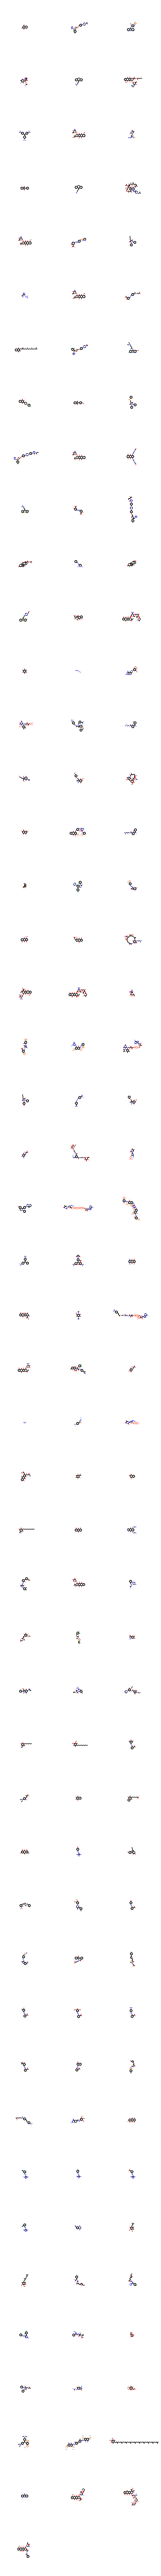

In [42]:
counter = 0
failing_mols = []
for i in drugbank_pains:
    if True in i[1]:
        counter += 1
        failing_mols.append(i[0])
print(counter)        
Draw.MolsToGridImage(failing_mols, )

142